In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers, Input 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Resizing, Rescaling , RandomFlip , RandomRotation
from tensorflow.keras import Sequential
import numpy as np
from PIL import Image

In [2]:
#constant values
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS = 3 
EPOCHS = 10
n_classes = 9

In [3]:
# loading of Data / Images
# Image preprocessing 
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\ASUS\OneDrive\Desktop\mini_project\Plant_Species_Indentification\data',
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE 
)

Found 3988 files belonging to 9 classes.


In [4]:
# Class Names or Labels Names
class_names = dataset.class_names
class_names

['Berry',
 'Fig',
 'Guava',
 'Orange',
 'Palm',
 'Persimmon',
 'Tomato',
 'apple',
 'grape']

In [5]:
#length of Dataset //  32*125 = 4000 / which approximately to our total number of images
len(dataset)

125

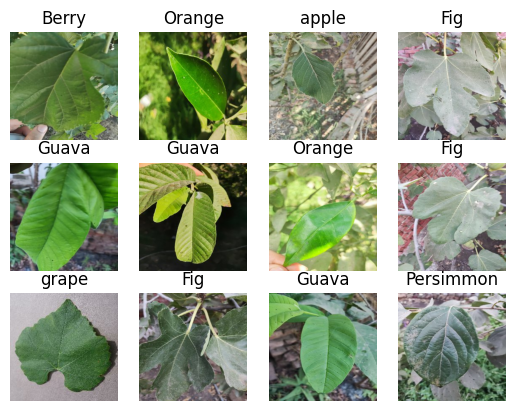

In [6]:
# randomly showing 12 images from the dataset 
for image_batch, label_batch in dataset.take(1):
   for i in range(12):
        ax= plt.subplot(3,4,i+1)# for printing in a matrics of 3*4
        plt.imshow(image_batch[i].numpy().astype("uint8"))# for printing image
        plt.title(class_names[label_batch[i]]) # for printing label name
        plt.axis("off")


In [7]:
#dividing the dataset for training , test and validation pourpose
#70% ==> training
#30% ==> 15% validation , 15% test

In [8]:
# for inatializing the lengthb of training data
train_size = 0.7
len(dataset)*train_size

87.5

In [9]:
test_ds = dataset.skip(98) 
len(test_ds)

27

In [10]:
# for inatializing the lengthb of validating data
val_size=0.15
len(dataset)*val_size

18.75

In [11]:
val_ds = test_ds.take(21)
len(val_ds)

21

In [12]:
test_ds = test_ds.skip(18)
len(test_ds)

9

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, shuffle= True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds= ds.take(train_size)

    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [14]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

87

In [16]:
len(val_ds)

18

In [17]:
len(test_ds)

20

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
# Define input
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
inputs = tf.keras.Input(shape=input_shape)

# Data preprocessing layers (if applicable)
x = layers.Rescaling(1.0 / 255)(inputs)  # Equivalent to resize_and_rescale
x = layers.RandomFlip("horizontalandvertical")(x)   # Equivalent to data_augmentation
x = layers.RandomRotation(0.2)(x)


# Convolutional and pooling layers
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten and dense layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)  # Dropout with 50% rate
outputs = layers.Dense(n_classes, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)


# Display model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,137 (719.29 KB)

 Trainable params: 184,137 (719.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
last_conv_layer = model.get_layer("conv2d_5")  # Example of accessing a specific layer


In [22]:
train_sample_count = sum(1 for _ in train_ds)
val_sample_count = sum(1 for _ in val_ds)

print(f"Number of samples in training set: {train_sample_count * BATCH_SIZE}")
print(f"Number of samples in validation set: {val_sample_count * BATCH_SIZE}")

Number of samples in training set: 2784
Number of samples in validation set: 576


In [23]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    shuffle=True
)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.1904 - loss: 2.7870 - val_accuracy: 0.3177 - val_loss: 1.8850
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.3678 - loss: 1.7802 - val_accuracy: 0.5955 - val_loss: 1.2309
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5432 - loss: 1.3804 - val_accuracy: 0.6372 - val_loss: 1.1296
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.6411 - loss: 1.1225 - val_accuracy: 0.7101 - val_loss: 0.8737
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 55s 636ms/step - accuracy: 0.6884 - loss: 0.9684 - val_accuracy: 0.7552 - val_loss: 0.7806
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 54s 619ms/step - accuracy: 0.6770 - loss: 0.9719 - val_accuracy: 0.7760 - val_loss: 0.7128
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 69s 799ms/step - accuracy: 0.7240 - loss: 0.8302 - val_accuracy: 0.8142 - val_loss: 0.6661
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 67s 771ms/step - accuracy: 0.7445 - loss: 0.8224 - val_accuracy: 0.

In [24]:
scores=model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.7328 - loss: 0.8121


In [25]:
scores

[0.8114513158798218, 0.75]

In [26]:
history

In [27]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 87}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

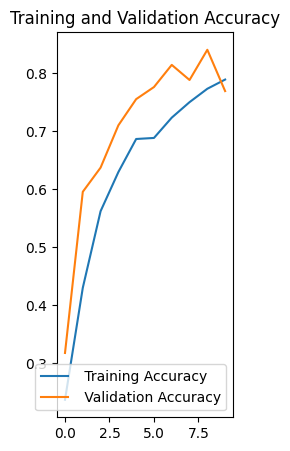

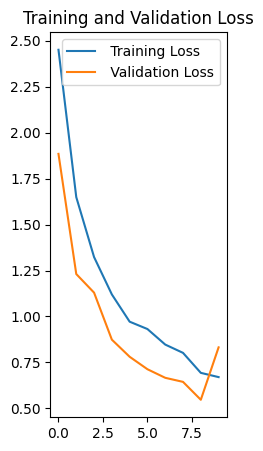

In [32]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label= ' Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label= ' Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy') 
plt.show()
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label= ' Training Loss')
plt.plot(range(EPOCHS),val_loss,label= ' Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss') 
plt.show()

In [48]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7730 - loss: 0.8221
Validation Accuracy: 76.91%


First image to predict
first image's actual label: apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted label: apple


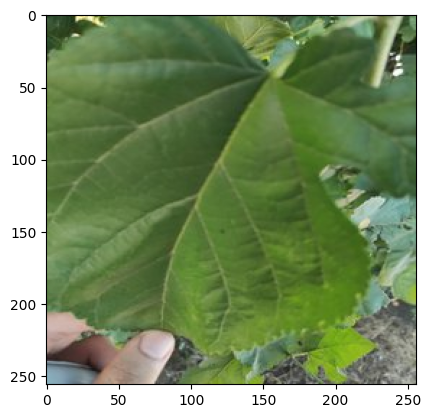

In [46]:
for images_batch, labels_batch in test_ds.take(1):
   
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


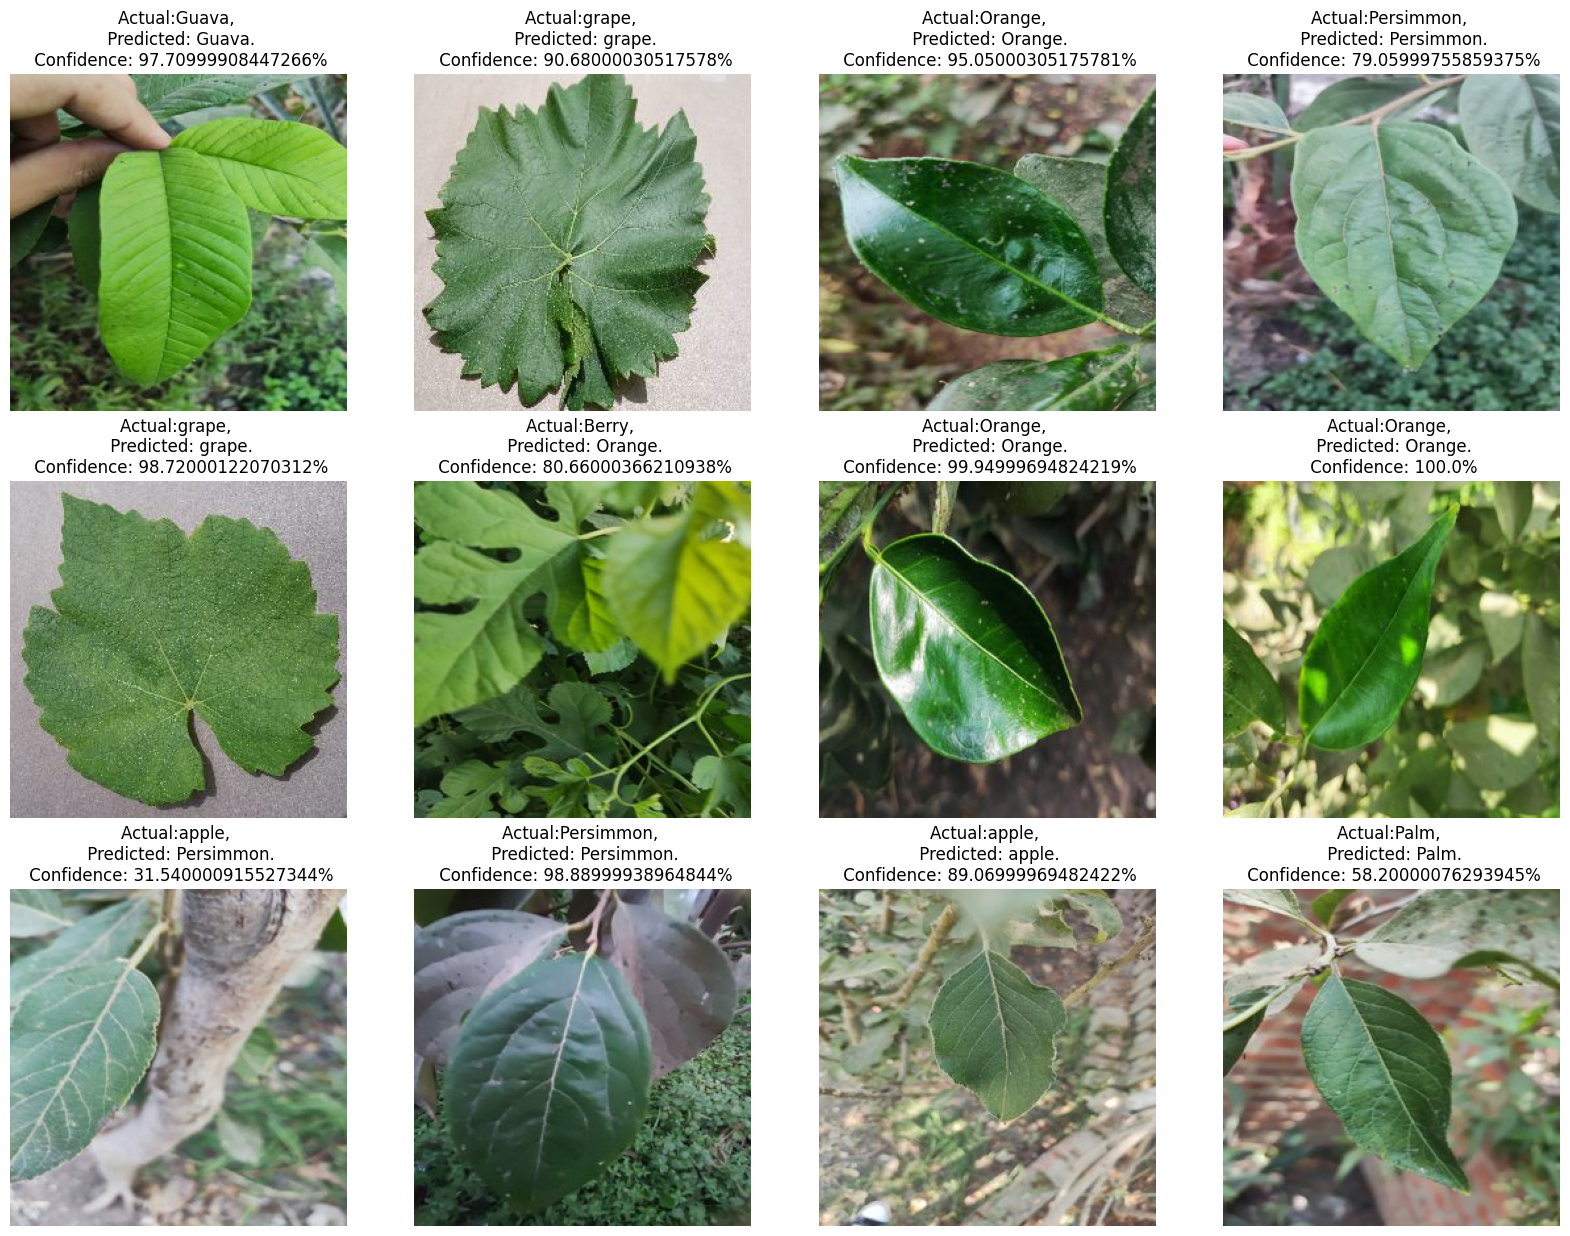

In [47]:
plt.figure(figsize=(20,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off") 

In [38]:
import numpy as np

y_true = []  # To store the true labels
y_pred = []  # To store the predicted labels

for images, labels in test_ds:
    # Check if labels are one-hot encoded (2D array) or class indices (1D array)
    if len(labels.shape) > 1:  # If labels are one-hot encoded
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    else:  # If labels are already class indices
        y_true.extend(labels.numpy())
    
    # Predict with the model
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class index
    y_pred.extend(predicted_classes)

# Convert lists to numpy arrays (optional, for compatibility)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Now you can use y_true and y_pred for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Classification Report:
              precision    recall  f1-score   support

       Berry       0.59      0.56      0.57        66
         Fig       0.85      0.64      0.73        74
       Guava       0.64      0.94 

In [39]:
from tensorflow.keras.models import Sequential

model_version = 1
# Save the model in the .keras format (recommended)
model.save("../models/saved_model4.keras")

# OR save it in .h5 format
#model.save("../models/saved_model4.h5")

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Grad-CAM utility functions
def preprocess_image(img_path, target_size=(256, 256)):
    """Load and preprocess the image for the model."""
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """Generate the Grad-CAM heatmap."""
    grad_model = tf.keras.models.Model(
        [model.input], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()


def display_gradcam(img_path, heatmap, alpha=0.4):
    """Superimpose the Grad-CAM heatmap on the original image and display it."""
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = plt.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

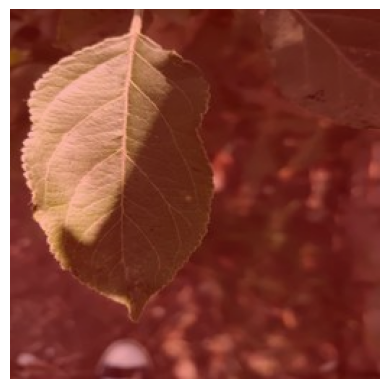

In [51]:
# Example usage
img_path = r"C:\Users\ASUS\OneDrive\Desktop\mini_project\Plant_Species_Indentification\data\apple\IMG_20240710_161211_1.jpg"
img_array = preprocess_image(img_path)
last_conv_layer_name = 'conv2d_5' 
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
display_gradcam(img_path, heatmap)


In [49]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.7676 - loss: 0.8268
Validation Accuracy: 76.91%
